<a href="https://colab.research.google.com/github/NeelPatil/ML-Projects/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plot

In [ ]:
import glob as gb 

In [ ]:
import cv2

In [ ]:
import os, random

In [ ]:
import seaborn as sns

In [ ]:
from keras.preprocessing import image

In [ ]:
import sklearn

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from skimage import transform

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neelvijaypatil","key":"9b650ef43eea39f835a079c12b1bd50e"}'}

In [ ]:
!rm -d ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 96% 334M/346M [00:01<00:00, 247MB/s]
100% 346M/346M [00:01<00:00, 230MB/s]


In [ ]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
System_Name = tf.test.gpu_device_name()

In [ ]:
if System_Name != '/device:GPU:0':
  raise SystemError('GPU device not found')

In [ ]:
print('Found GPU at: {}'.format(System_Name))

Found GPU at: /device:GPU:0


In [ ]:
TrainingData_MemoryPath = '/content/seg_train/seg_train'

In [ ]:
TestingData_MemoryPath = '/content/seg_test/seg_test'

In [ ]:
PredictingData_MemoryPath = '/content/seg_pred/seg_pred'

In [ ]:
TrainingData_ImageGenerator = ImageDataGenerator(rescale = 1./255,    
                                      shear_range = 0.2,
                                      rotation_range=20,
                                      zoom_range = 0.2,
                                      horizontal_flip = True)

In [ ]:
TestingData_ImageGenerator = ImageDataGenerator(rescale = 1./255)

In [ ]:
Generated_TrainingData = TrainingData_ImageGenerator.flow_from_directory(TrainingData_MemoryPath,
                                                      target_size = (64,64),
                                                      class_mode = 'sparse',
                                                      shuffle = True,
                                                      batch_size=32)

Found 14034 images belonging to 6 classes.


In [ ]:
Generated_TestingData = TestingData_ImageGenerator.flow_from_directory(TestingData_MemoryPath, 
                                                    target_size = (64,64),
                                                    class_mode = 'sparse',
                                                    shuffle=False,
                                                    batch_size=32)

Found 3000 images belonging to 6 classes.


In [ ]:
Label_Encoding = Generated_TrainingData.class_indices

In [ ]:
Label_Encoding

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [ ]:
def Uploading_TrainingData(Source_MemoryPath):
  Images_List = []
  names_list = []
  for name in os.listdir(Source_MemoryPath):
    File_MemoryPath = gb.glob(pathname = Source_MemoryPath+ '/'+ name+'/*.jpg')
    for p in File_MemoryPath:
      image = plot.imread(p)
      Resized_Images = cv2.resize(image,(64,64) )
      Images_List.append(Resized_Images)
      names_list.append(Label_Encoding[name])
  return Images_List, names_list

In [ ]:
def x(Source_MemoryPath):
  resizedImages = []
  for name in os.listdir(Source_MemoryPath):
    path_file = Source_MemoryPath+'/'+ name
    image = plot.imread(path_file)
    Resized_Images = cv2.resize(image,(64,64) )
    resizedImages.append(Resized_Images)
  return resizedImages

In [ ]:
X_TrainingData, Y_TrainingData = Uploading_TrainingData(TrainingData_MemoryPath)

In [ ]:
print('Length of Training set:', len(X_TrainingData), len(Y_TrainingData))

Length of Training set: 14034 14034


In [ ]:
X_PredictingData =  x(PredictingData_MemoryPath)

In [ ]:
print('Length of Predicting set:', len(X_PredictingData))

Length of Predicting set: 7301


In [ ]:
from sklearn.utils import shuffle

In [ ]:
X_TrainingData, Y_TrainingData = sklearn.utils.shuffle(np.array(X_TrainingData), np.array(Y_TrainingData), random_state = 42)

In [ ]:
X_PredictingData = np.array(X_PredictingData)

In [ ]:
def CNN_Model_Algorithm():
  cnn = Sequential()
  cnn.add(Conv2D(32, (3,3), activation='relu', input_shape = (64,64,3)))
  cnn.add(MaxPooling2D(pool_size = (2,2)))
  cnn.add(Conv2D(64, (3,3), activation = 'relu'))
  cnn.add(MaxPooling2D(pool_size = (2,2)))
  cnn.add(Conv2D(64, (3,3), activation = 'relu'))
  cnn.add(MaxPooling2D(pool_size = (2,2)))
  cnn.add(Flatten())
  cnn.add(Dense(32, activation = 'relu'))
  cnn.add(Dense(16, activation = 'relu'))
  cnn.add(Dense(6, activation = 'softmax'))
  return cnn

In [ ]:
kfold = KFold(n_splits = 10, shuffle = True)

In [ ]:
K_Fold_Accuracy = []

In [ ]:
K_Fold_Loss = []

In [ ]:
fold = 1

In [ ]:
for TrainingData, test in kfold.split(np.zeros(len(Y_TrainingData)),Y_TrainingData):
  Generated_TrainingData = TrainingData_ImageGenerator.flow(X_TrainingData[TrainingData], Y_TrainingData[TrainingData], batch_size=32)
  Value_Generated = TestingData_ImageGenerator.flow(X_TrainingData[test], Y_TrainingData[test], batch_size=32)
  cnn = CNN_Model_Algorithm()
  cnn.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])
  print ('-'*35, '\nTraining on fold {}'.format(fold))
  history = cnn.fit(Generated_TrainingData,  
                    epochs = 5,
                    validation_data=(Value_Generated) )
  
  Model_Scores = cnn.evaluate(Value_Generated, verbose=1)
  print(f"Score of fold: {fold}: {cnn.metrics_names[0]} is {Model_Scores[0]}, {cnn.metrics_names[1]} is {Model_Scores[1]}")
  
  K_Fold_Loss.append(Model_Scores[0])
  K_Fold_Accuracy.append(Model_Scores[1])
  fold += 1

----------------------------------- 
Training on fold 1
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


395/395 [==============================] - 27s 38ms/step - loss: 1.2457 - accuracy: 0.4870 - val_loss: 0.9844 - val_accuracy: 0.6026
Epoch 2/5
395/395 [==============================] - 15s 38ms/step - loss: 0.9743 - accuracy: 0.6177 - val_loss: 0.9978 - val_accuracy: 0.6453
Epoch 3/5
395/395 [==============================] - 15s 39ms/step - loss: 0.8866 - accuracy: 0.6645 - val_loss: 0.8789 - val_accuracy: 0.6866
Epoch 4/5
395/395 [==============================] - 15s 38ms/step - loss: 0.8036 - accuracy: 0.7053 - val_loss: 0.7648 - val_accuracy: 0.7279
Epoch 5/5
44/44 [==============================] - 0s 5ms/step - loss: 0.7547 - accuracy: 0.7365
Score of fold: 1: loss is 0.7546999454498291, accuracy is 0.7364672422409058
----------------------------------- 
Training on fold 2
Epoch 1/5
395/395 [==============================] - 16s 39ms/step - loss: 1.1804 - accuracy: 0.5170 - val_loss: 1.1215 - val_accuracy: 0.5584
Epoch 2/5
395/395 [==============================] - 15s 38ms/ste

In [ ]:
print('Accuracy: ', np.mean(K_Fold_Accuracy))

Accuracy:  0.7477621257305145


In [ ]:
print('Loss: ', np.mean(K_Fold_Loss))

Loss:  0.694686084985733


In [ ]:
print('Loss: ', np.mean(K_Fold_Loss))

Loss:  0.694686084985733


In [ ]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 64)        

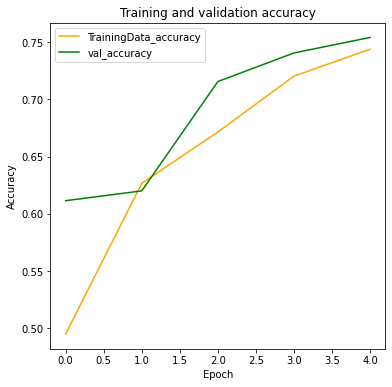

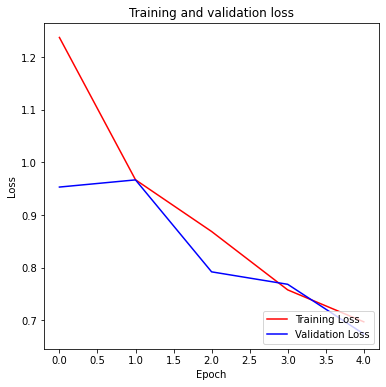

In [ ]:
plot.figure(figsize=(6,6))
plot.plot(history.history['accuracy'],'orange', label = 'TrainingData_accuracy')
plot.plot(history.history['val_accuracy'], 'g', label = 'val_accuracy')
plot.xlabel('Epoch')
plot.ylabel('Accuracy')
plot.legend()
plot.title('Training and validation accuracy')
plot.show()

plot.figure(figsize=(6,6))
plot.plot( history.history['loss'], 'r', label='Training Loss')
plot.plot( history.history['val_loss'], 'b', label='Validation Loss')
plot.xlabel('Epoch')
plot.ylabel('Loss')
plot.title('Training and validation loss')
plot.legend()
plot.legend(loc = 'lower right')
plot.show()

In [ ]:
cnn.fit(Generated_TrainingData, epochs = 5,  verbose = 1)

Epoch 1/5
395/395 [==============================] - 15s 37ms/step - loss: 0.6507 - accuracy: 0.7641
Epoch 2/5
395/395 [==============================] - 15s 37ms/step - loss: 0.6278 - accuracy: 0.7704
Epoch 3/5
395/395 [==============================] - 15s 38ms/step - loss: 0.5932 - accuracy: 0.7930
Epoch 4/5
395/395 [==============================] - 15s 38ms/step - loss: 0.5869 - accuracy: 0.7881
Epoch 5/5
395/395 [==============================] - 15s 37ms/step - loss: 0.5554 - accuracy: 0.7991


In [ ]:
Model_Loss, Model_Accuracy = cnn.evaluate(Generated_TestingData)

 1/94 [..............................] - ETA: 22s - loss: 0.8715 - accuracy: 0.6562

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


94/94 [==============================] - 3s 33ms/step - loss: 0.6229 - accuracy: 0.7783


In [ ]:
print('Loss is: ', Model_Loss)

Loss is:  0.6229001879692078


In [ ]:
print('Accuracy is: ', Model_Accuracy)

Accuracy is:  0.778333306312561


In [ ]:
Y_PredictingData = np.argmax(cnn.predict(Generated_TestingData), axis=-1) 

In [ ]:
y_true = Generated_TestingData.classes

In [ ]:
print(classification_report(y_true, Y_PredictingData, target_names=Label_Encoding))

              precision    recall  f1-score   support

   buildings       0.73      0.74      0.73       437
      forest       0.88      0.96      0.92       474
     glacier       0.68      0.82      0.74       553
    mountain       0.87      0.58      0.70       525
         sea       0.82      0.69      0.75       510
      street       0.77      0.89      0.82       501

    accuracy                           0.78      3000
   macro avg       0.79      0.78      0.78      3000
weighted avg       0.79      0.78      0.77      3000



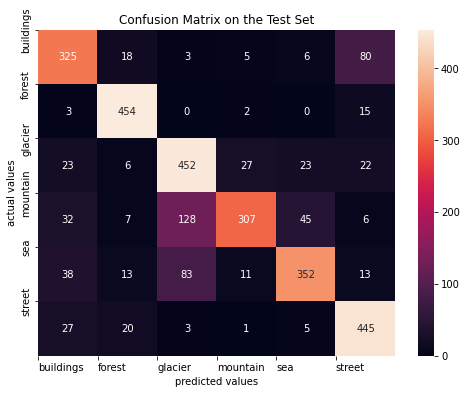

In [ ]:
Error_Matrix = confusion_matrix(y_true, Y_PredictingData)
label_names = [k for k in Label_Encoding.keys()]
plot.figure(figsize=(8,6))
sns.heatmap(Error_Matrix, annot = True, fmt=".0f")
tick_marks = np.arange(len(label_names))
plot.xticks(tick_marks, label_names, horizontalalignment='left')
plot.yticks(tick_marks, label_names)
plot.xlabel ('predicted values')
plot.ylabel ('actual values')
plot.title('Confusion Matrix on the Test Set')
plot.show()

In [ ]:
PredictingData_Generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
Generated_PredictionData = PredictingData_Generator.flow(X_PredictingData, batch_size=32, shuffle = False)

In [ ]:
Y_PredictingData = cnn.predict(Generated_PredictionData, batch_size=32)

In [ ]:
def Uploading_Images(path):
  file_path = random.choice(gb.glob(pathname = path+'/*.jpg'))
  img = image.load_img(file_path, target_size=(150, 150))
  np_image = np.array(img).astype('float32')/255
  np_image = transform.resize(np_image, (64, 64, 3))
  np_image_exp = np.expand_dims(np_image, axis=0)
  return img,np_image_exp

In [ ]:
classes_decoded = dict([(v, k) for k, v in Label_Encoding.items()])

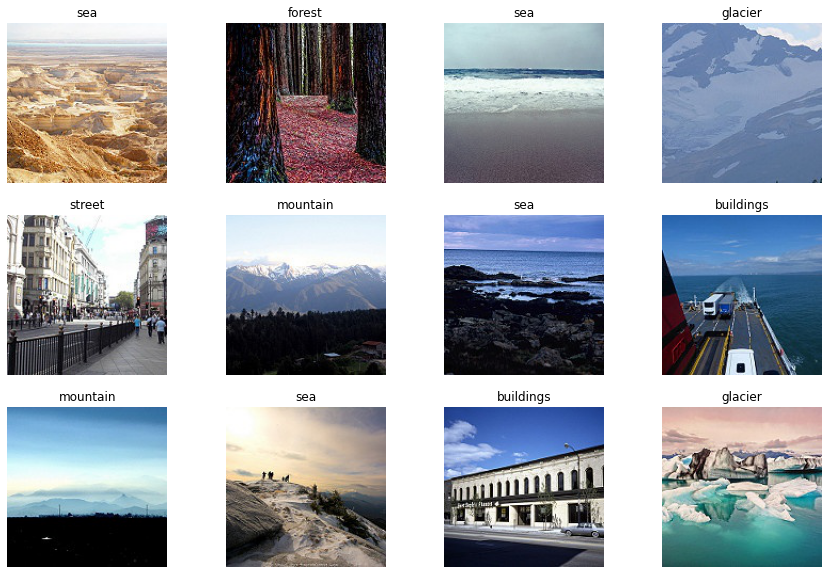

In [ ]:
plot.figure(figsize=(15,10))
for i in range (12):
  ax = plot.subplot(3,4,i+1)
  img = Uploading_Images(PredictingData_MemoryPath)
  label=np.argmax(cnn.predict(img[1]), axis=-1)
  plot.title(classes_decoded[int(label)])
  plot.imshow(img[0])
  plot.axis("off")

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
TrainingData_ImageGenerator = ImageDataGenerator(rescale = 1./255,    
                                      shear_range = 0.2,
                                      rotation_range=20,
                                      zoom_range = 0.2,
                                      horizontal_flip = True,
                                      validation_split=0.2) 

In [ ]:
Generated_TrainingData = TrainingData_ImageGenerator.flow_from_directory(TrainingData_MemoryPath, 
                                     target_size = (150,150),
                                     class_mode = 'sparse',
                                     batch_size = 32, 
                                     shuffle=True,
                                     subset='training') 


Found 11230 images belonging to 6 classes.


In [ ]:
Value_Generated = TrainingData_ImageGenerator.flow_from_directory(TrainingData_MemoryPath, 
                                     target_size = (150,150),
                                     class_mode = 'sparse',
                                     batch_size = 32, 
                                     shuffle=True,
                                     subset='validation')


Found 2804 images belonging to 6 classes.


In [ ]:
TestingData_ImageGenerator = ImageDataGenerator(rescale=1./255)                           
Generated_TestingData = TestingData_ImageGenerator.flow_from_directory(TestingData_MemoryPath, 
                                     target_size = (150,150),
                                     class_mode = 'sparse',
                                     shuffle = False)


Found 3000 images belonging to 6 classes.


In [ ]:
Base_Conversion = ResNet50V2(input_shape=(150,150, 3), 
                     include_top=False, 
                     weights='imagenet')


94683136/94668760 [==============================] - 2s 0us/step


In [ ]:
number_layers = 150

In [ ]:
for layers in Base_Conversion.layers[:number_layers]:
    layers.trainable = False

In [ ]:
Base_Conversion.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']    

In [ ]:
print('The number of layers: ', len(Base_Conversion.layers))

The number of layers:  190


In [ ]:
Best_Model = Base_Conversion

In [ ]:
Best_Model = Best_Model.output

In [ ]:
Best_Model = tf.keras.layers.GlobalMaxPooling2D()(Best_Model)

In [ ]:
Best_Model = tf.keras.layers.Flatten(name="Flatten")(Best_Model)

In [ ]:
Best_Model = tf.keras.layers.Dense(1024, activation='relu')(Best_Model)

In [ ]:
Best_Model = tf.keras.layers.Dropout(0.2)(Best_Model)

In [ ]:
prediction_layer = tf.keras.layers.Dense(6, activation='softmax')(Best_Model)

In [ ]:
tf_model = tf.keras.Model(inputs=Base_Conversion.input, outputs=prediction_layer)

In [ ]:
tf_model.compile(optimizer='adam', 
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics = 'accuracy')

In [ ]:
tf_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 77, 77, 64)   0           ['conv1_conv[0][0]']         

In [ ]:
history = tf_model.fit(Generated_TrainingData, 
                     epochs = 5,
                     validation_data =Value_Generated,
                     batch_size = 32)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


351/351 [==============================] - 108s 291ms/step - loss: 0.7458 - accuracy: 0.8304 - val_loss: 0.9422 - val_accuracy: 0.8627
Epoch 2/5
351/351 [==============================] - 84s 239ms/step - loss: 0.3913 - accuracy: 0.8830 - val_loss: 0.4055 - val_accuracy: 0.8752
Epoch 3/5
351/351 [==============================] - 84s 239ms/step - loss: 0.3352 - accuracy: 0.8950 - val_loss: 0.3029 - val_accuracy: 0.8919
Epoch 4/5
351/351 [==============================] - 84s 240ms/step - loss: 0.2820 - accuracy: 0.9014 - val_loss: 0.2500 - val_accuracy: 0.9069
Epoch 5/5
351/351 [==============================] - 84s 238ms/step - loss: 0.3355 - accuracy: 0.9036 - val_loss: 0.2630 - val_accuracy: 0.9130


In [ ]:
Model_Loss, Model_Accuracy = tf_model.evaluate(Generated_TestingData)

94/94 [==============================] - 6s 62ms/step - loss: 0.2998 - accuracy: 0.9083


In [ ]:
print('Loss is: ', Model_Loss)

Loss is:  0.2997560203075409


In [ ]:
print('Accuracy is: ', Model_Accuracy)

Accuracy is:  0.9083333611488342


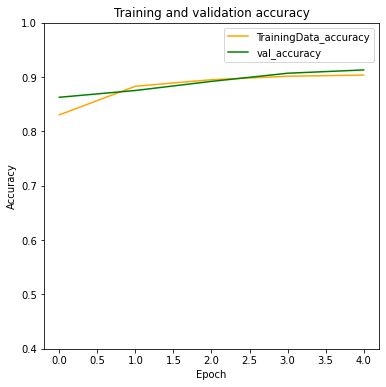

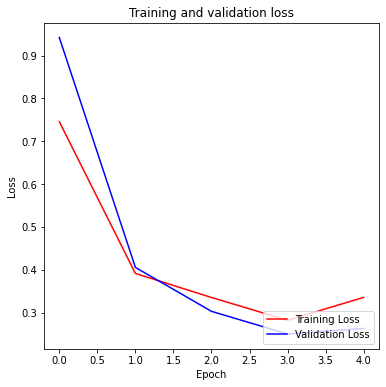

In [ ]:
plot.figure(figsize=(6,6))
plot.plot(history.history['accuracy'],'orange', label = 'TrainingData_accuracy')
plot.plot(history.history['val_accuracy'], 'g', label = 'val_accuracy')
plot.xlabel('Epoch')
plot.ylabel('Accuracy')
plot.legend()
plot.ylim([0.4, 1])
plot.title('Training and validation accuracy')
plot.show()

plot.figure(figsize=(6,6))
plot.plot( history.history['loss'], 'r', label='Training Loss')
plot.plot( history.history['val_loss'], 'b', label='Validation Loss')
plot.xlabel('Epoch')
plot.ylabel('Loss')
plot.title('Training and validation loss')
plot.legend()
plot.legend(loc = 'lower right')
plot.show()

In [ ]:
y_true = Generated_TestingData.classes

In [ ]:
label_names = Generated_TestingData.class_indices

In [ ]:
Y_PredictingData = np.argmax(tf_model.predict(Generated_TestingData), axis=-1) 

In [ ]:
print(classification_report(y_true, Y_PredictingData,  target_names=label_names))

              precision    recall  f1-score   support

   buildings       0.94      0.89      0.92       437
      forest       0.98      0.99      0.99       474
     glacier       0.83      0.89      0.86       553
    mountain       0.89      0.83      0.86       525
         sea       0.92      0.90      0.91       510
      street       0.92      0.95      0.93       501

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



In [ ]:
def Uploading_Images(path):
  file_path = random.choice(gb.glob(pathname = path+'/*.jpg'))
  img = image.load_img(file_path, target_size=(150, 150))
  np_image = np.array(img).astype('float32')/255
  np_image_exp = np.expand_dims(np_image, axis=0)
  return img,np_image_exp

In [ ]:
classes_decoded = dict([(v, k) for k, v in Generated_TrainingData.class_indices.items()])

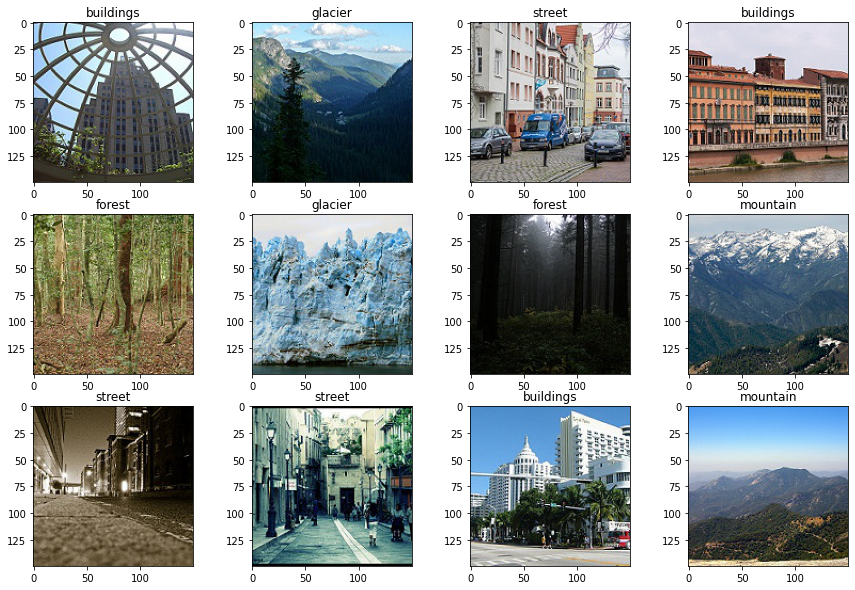

In [ ]:
plot.figure(figsize=(15,10))
for i in range (12):
  ax = plot.subplot(3,4,i+1)
  img = Uploading_Images(PredictingData_MemoryPath)
  label=np.argmax(tf_model.predict(img[1]), axis=-1)
  plot.title(classes_decoded[int(label)])
  plot.imshow(img[0])

In [ ]:
y_true = Generated_TestingData.classes

In [ ]:
label_names = Generated_TestingData.class_indices

In [ ]:
Y_PredictingData = np.argmax(tf_model.predict(Generated_TestingData), axis=-1)

In [ ]:
print(classification_report(y_true, Y_PredictingData, target_names=label_names))

              precision    recall  f1-score   support

   buildings       0.94      0.89      0.92       437
      forest       0.98      0.99      0.99       474
     glacier       0.83      0.89      0.86       553
    mountain       0.89      0.83      0.86       525
         sea       0.92      0.90      0.91       510
      street       0.92      0.95      0.93       501

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000

